In [6]:
from imutils import paths 
import os , cv2
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Activation,Dropout
import numpy as np ; import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

In [2]:
SMILE_DATASET_PATH =  os.path.join("C:/codes/machineL/CODING/Image/data/Smile-dataset/train_folder/")
SMILE_VALIDATION_PATH = os.path.join("C:/codes/machineL/CODING/Image/data/Smile-dataset/test_folder/")

In [3]:
train_gen  = ImageDataGenerator(rescale=1/255)
train_data = train_gen.flow_from_directory(
    SMILE_DATASET_PATH,
    target_size=(64,64),
    class_mode="binary",
    color_mode="grayscale" 
)

test_gen  = ImageDataGenerator(rescale=1/255)
test_data = train_gen.flow_from_directory(
    SMILE_DATASET_PATH,
    target_size=(64,64),
    class_mode="binary",
    color_mode="grayscale" 
)

Found 2800 images belonging to 2 classes.
Found 2800 images belonging to 2 classes.


## Using A simple CONV Neural Network

In [4]:
model = Sequential([
    Conv2D(32,(3,3),padding="same",input_shape=(64,64,1)),
    MaxPool2D(2,2),
    Conv2D(64,(3,3),padding="same"),
    MaxPool2D(2,2),
    Flatten(),
    Dense(1,activation='sigmoid')
    
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 1)                 1

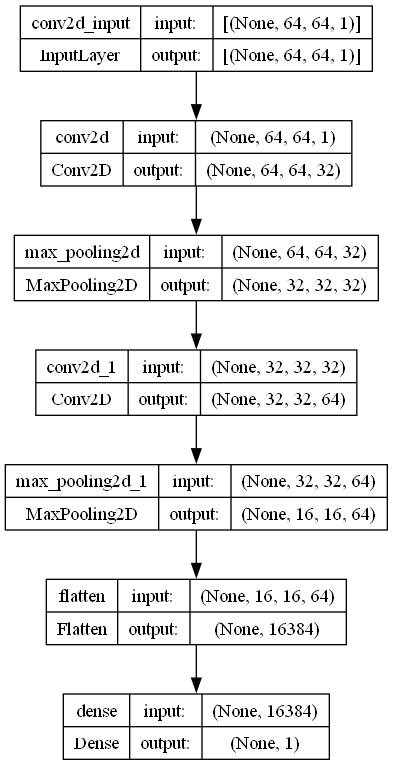

In [5]:
plot_model(model,to_file = "smile_conv.png",show_layer_names=True,show_shapes=True)

In [12]:
history = model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
88/88 [==============================] - 7s 76ms/step - loss: 0.6631 - accuracy: 0.5932 - val_loss: 0.5897 - val_accuracy: 0.7218
Epoch 2/10
88/88 [==============================] - 7s 74ms/step - loss: 0.5248 - accuracy: 0.7454 - val_loss: 0.4194 - val_accuracy: 0.8200
Epoch 3/10
88/88 [==============================] - 6s 73ms/step - loss: 0.3934 - accuracy: 0.8211 - val_loss: 0.3290 - val_accuracy: 0.8614
Epoch 4/10
88/88 [==============================] - 8s 93ms/step - loss: 0.3243 - accuracy: 0.8632 - val_loss: 0.2872 - val_accuracy: 0.8814
Epoch 5/10
88/88 [==============================] - 9s 104ms/step - loss: 0.3073 - accuracy: 0.8761 - val_loss: 0.2737 - val_accuracy: 0.8857
Epoch 6/10
88/88 [==============================] - 9s 106ms/step - loss: 0.2811 - accuracy: 0.8807 - val_loss: 0.2752 - val_accuracy: 0.8864
Epoch 7/10
88/88 [==============================] - 10s 110ms/step - loss: 0.2780 - accuracy: 0.8857 - val_loss: 0.2347 - val_accuracy: 0.9036
Epoch 8/1

In [13]:
loss,acc = model.evaluate(test_data)
acc

88/88 [==============================] - 2s 27ms/step - loss: 0.2132 - accuracy: 0.9114


0.9114285707473755

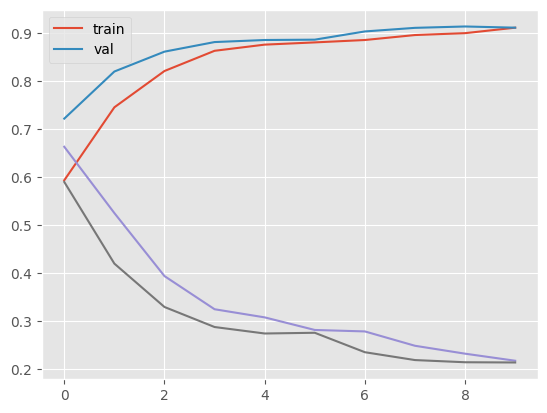

In [14]:
## Accuracy
plt.style.use("ggplot")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["train","val"],loc='upper left')


## Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["train", "val"],loc='upper left')

In [15]:
### NOTE DOWN 
### In flow_from_directory function there is nothing called (32,32,1)  for that use (32,32)  and color_mode = "grayscale"
### with binary_crossentropy always sigmoid  😊 😊

## Making predictions

1/1 [==============================] - 0s 45ms/step


Text(0.5, 0, 'Not Smiling')

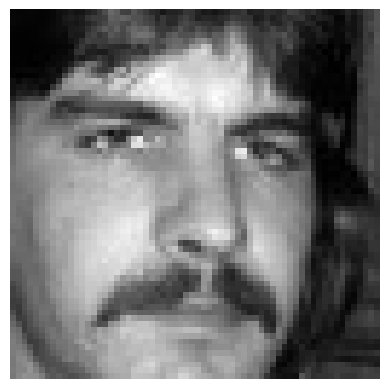

In [14]:
img_path = "C:/codes/machineL/CODING/Image/data/Smile-dataset/train_folder/0/file2169.jpg"
img=  cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
img_pred  = img.reshape(-1,64,64)
label =  "Smiling" if  model.predict(img_pred)[0] > 0 else "Not Smiling"
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.xlabel(label)

In [43]:
 ## model.save("smile.hdf5")   ## saving Model 